## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combinedData = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
combinedData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice. by getting a list of unique mouse ids and then getting the length of that list with len
numCombinedMice = len(combinedData["Mouse ID"].unique())
print("The number of mice:", numCombinedMice)

The number of mice: 249


In [4]:
#checking for any mouse with a duplicate time point
#using the duplicated function to determine what rows are duplicated, |||line 909
dupMouseData = combinedData.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'

#using the .loc and unique function to traverse the combinedData frame and search for the one that said true
duplicateMouse = combinedData.loc[dupMouseData].unique()
print("the duplicate mouse ID is",duplicateMouse)

#turning it into a dataframe
duplicateMouseDF = pd.DataFrame(duplicateMouse)
duplicateMouse

the duplicate mouse ID is ['g989']


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

#-------display the data assossicated

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#by setting the cleanData equal to the combinedData when the duplicateMouse is now showing 
#by using the isinfunction and setting it to false
cleanedData = combinedData[combinedData['Mouse ID'].isin(duplicateMouse)==False]
cleanedData

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
lenMice = len(cleanedData["Mouse ID"].value_counts())
lenMice

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mean
tumorMean = cleanedData.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]

#median
tumorMedian = cleanedData.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]

#variance
tumorVar = cleanedData.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]

#standard deviation
tumorSTD = cleanedData.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]

#sem (standard error of the mean)
tumorSem = cleanedData.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]



In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sumStats = pd.DataFrame({"Mean": tumorMean, "Median":tumorMedian, "Variance":tumorVar, "Standard Deviation":tumorSTD, "SEM (Standard Error of the Mean)":tumorSem})

# Using the aggregation method, produce the same summary statistics in a single line
#first grouping the dataframe by "Drug Regimen"
drugRegimenGroup = cleanedData.groupby('Drug Regimen')
#using the .agg function to compile each type of summary stat in a sinlge line
singleLineData = drugRegimenGroup.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
singleLineData

C:\Users\krist\AppData\Local\Temp\ipykernel_24968\880279980.py:8: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  singleLineData = drugRegimenGroup.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [10]:
#fist im going to make a series of just drug regimen for both pie and bar chart
barCharData = cleanedData.groupby(["Drug Regimen"]).count()["Mouse ID"]

Text(0.5, 0, 'Number of Mice')

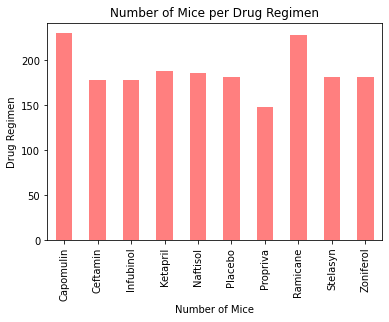

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
countDrugReg = barCharData

#plotting the bar chart using the pandas method
countDrugPlt1 = countDrugReg.plot.bar(color='r', alpha=0.5, align="center",legend=False)

#labeling the bar chart using the pandas method
countDrugPlt1.set_title("Number of Mice per Drug Regimen")
countDrugPlt1.set_ylabel("Drug Regimen")
countDrugPlt1.set_xlabel("Number of Mice")


Text(0, 0.5, 'Number of Mice')

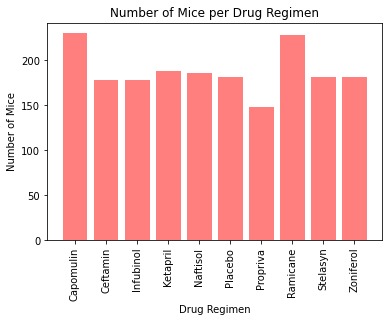

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#setting the x and y axis
xAxis = np.arange(len(barCharData))
yAxis = barCharData

#setting the ticks
tickLocation = [x for x in xAxis]

#plotting the bar chart using the x and y axis we made above
plt.bar(xAxis, yAxis, color='r', alpha=0.5, align='center')
plt.xticks(tickLocation, barCharData.index.values)
#rotating the xticks so they are vertical
plt.xticks(rotation=90)

#setting the titles and labels with the pyplot method
plt.title("Number of Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


Text(0, 0.5, ' ')

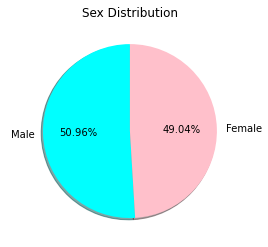

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderValues = cleanedData["Sex"].value_counts()

#setting the colors for the piechart
pieColor = ("cyan", "pink")

#plotting the gender values using the pandas option
piePlot = genderValues.plot.pie(autopct="%1.2f%%", startangle=90, title='Sex Distribution', colors = pieColor, shadow = True)

#setting the y label to blank so it does not cover the male label
piePlot.set_ylabel(" ")

Text(0.5, 1.0, 'Sex Distribution')

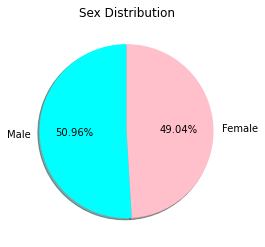

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#reusing genderValues from the last pie chart 
genderValues1 = cleanedData["Sex"].value_counts()

#setting the colors for the piechart
pieColor = ("cyan", "pink")

#plotting the gender values using the matplotlib option
plt.pie(genderValues1, labels=genderValues1.index.values, autopct="%1.2f%%", startangle=90, colors = pieColor, shadow = True)
plt.title("Sex Distribution")


## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#using the group by function for the mouse ID/timepoint and using the max function to get the greaetst timepoint
maxTime = cleanedData.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorVolDf = pd.merge(maxTime, cleanedData, on=(["Mouse ID","Timepoint"]))

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Capomulin, Ramicane, Infubinol, and Ceftamin
#^list to use
treatmentList = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorVolData = []


#Locate the rows which contain mice on each drug and get the tumor volumes
#using a for loop that will iterate through the treatmentList
#first to get the rows for the drug regimen using the maxTime dataset 
#**using the .loc function
#then getting the tumor volumes of that row
for drug in treatmentList:
    drugRegimen = tumorVolDf.loc[tumorVolDf["Drug Regimen"] == drug]
    tumorPlcHldr = drugRegimen["Tumor Volume (mm3)"]
    
    # add subset 
    tumorVolData.append(tumorPlcHldr)


In [17]:
#Calculate the IQR and quantitatively determine if there are any potential outliers.
#calculating quartiles, IQR, and potential outliers
#i know that this could be but in the for loop above but I could not for the life of me get it to work ):

#Capomulin quartiles
campomulinQuart = tumorVolData[0].quantile([0.25,0.5,0.75])
campomulinLowq = campomulinQuart[0.25]
campomulinUpq = campomulinQuart[0.75]
campomulinIQR = campomulinUpq - campomulinLowq

#Ramicane quartiles
ramicaneQuart = tumorVolData[1].quantile([0.25,0.5,0.75])
ramicaneLowq = ramicaneQuart[0.25]
ramicaneUpq = ramicaneQuart[0.75]
ramicaneIQR = ramicaneUpq - ramicaneLowq

#Infubinol quartiles
infubinolQuart = tumorVolData[2].quantile([0.25,0.5,0.75])
infubinolLowq = infubinolQuart[0.25]
infubinolUpq = infubinolQuart[0.75]
infubinolIQR = infubinolUpq - infubinolLowq

#Ceftamin quartiles
ceftaminQuart = tumorVolData[2].quantile([0.25,0.5,0.75])
ceftaminLowq = ceftaminQuart[0.25]
ceftaminUpq = ceftaminQuart[0.75]
ceftaminIQR = ceftaminUpq - ceftaminLowq


# Determine outliers using upper, lower bounds, and IQR
#Capomulin
lowerBoundCap = campomulinLowq - (1.5*campomulinIQR)
upperBoundCap = campomulinUpq + (1.5*campomulinIQR)

#Ramicane
lowerBoundRam = ramicaneLowq - (1.5*ramicaneIQR)
upperBoundRam = ramicaneUpq + (1.5*ramicaneIQR)

#Infubinol
lowerBoundInf = infubinolLowq - (1.5*infubinolIQR)
upperBoundInf = infubinolUpq + (1.5*infubinolIQR)

#Ceftamin
lowerBoundCef = ceftaminLowq - (1.5*ceftaminIQR)
upperBoundCef = ceftaminUpq + (1.5*ceftaminIQR)


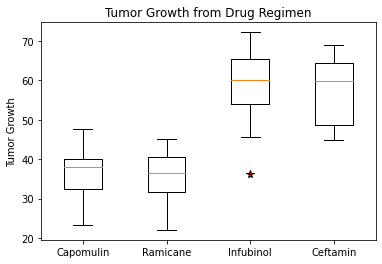

In [18]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
filerProp = dict(marker='*', markerfacecolor='r', markersize=8, markeredgecolor='black')

#setting the boxplot using the plt.boxplot method
plt.boxplot(tumorVolData, flierprops = filerProp , labels = treatmentList)

#adding labels
plt.title('Tumor Growth from Drug Regimen')
plt.ylabel('Tumor Growth')
plt.show()


## Line and Scatter Plots

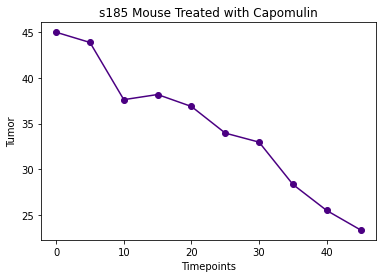

In [41]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# capoMice = cleanedData.loc[cleanedData["Drug Regimen"] == "Capomulin"]
# print(capoMice)

#getting the data for the mouse s185
capoMouse = cleanedData.loc[cleanedData["Mouse ID"] == "s185"]

#setting the x and y axis to timepoint and tumor vol
timeXaxis = capoMouse["Timepoint"]
tumorVolYaxis = capoMouse["Tumor Volume (mm3)"]

#plotting the data
plt.plot(timeXaxis, tumorVolYaxis, color = "indigo", marker = "o")
plt.title("s185 Mouse Treated with Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor")
plt.show()



In [37]:
#a list of mice that used capomulin
capMice = cleanedData.loc[cleanedData["Drug Regimen"] == "Capomulin"]
capMice.value_counts("Mouse ID")

Mouse ID
a818    10
l725    10
z795    10
t724    10
r701    10
b559    10
n304    10
r604    10
l700    10
e584    10
e213    10
z969    10
j755    10
x264     9
v295     9
e291     6
m133     6
x930     6
f993     5
v835     5
o725     4
y601     2
z234     2
v199     1
x336     1
dtype: int64

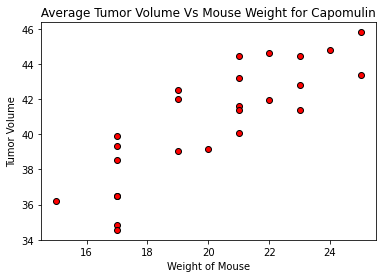

In [36]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#getting a list of the averages, specifically so we can pull the mean weight and mean tumor volume
capoAvg = capMice.groupby('Mouse ID').mean()
weightXaxis=capoAvg["Weight (g)"]
tumorYaxis= capoAvg["Tumor Volume (mm3)"]

#printing out the scatter plot
plt.scatter(weightXaxis,tumorYaxis,marker="o", facecolors="red", edgecolors="black")
plt.title(" Average Tumor Volume Vs Mouse Weight for Capomulin ")
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

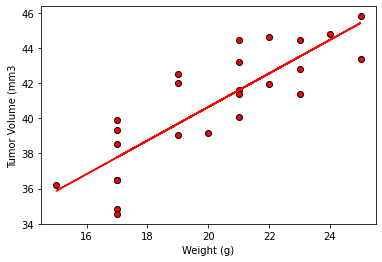

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#getting the x and y axis
weightX=capoAvg["Weight (g)"]
tumorY= capoAvg["Tumor Volume (mm3)"]

#getting the values to determine the line
(slope, intercept, rValue, pValue, stdErr) = linregress(weightX, tumorY)
regressValues = weightX * slope + intercept

#setting the equation
lineEq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plotting the scatterplot with the regression line
plt.scatter(weightX, tumorY, marker="o", facecolors="red", edgecolors="black")
plt.plot(weightX, regressValues,"r-")
plt.annotate(lineEq,(5.8,0.8),fontsize=15,color="blue")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3')
plt.show()
